In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
WRITE_PATH = Path('C:\\', 'Temp', 'Screening_Result')
SAVE_FIGURE = [True, Path('C:\\', 'Temp', 'Screening_Figures')]

In [11]:
all_data = pd.read_csv(Path(WRITE_PATH,'2019','11','07','chemical','results','all_results.csv'))
all_data = all_data.replace([np.inf, -np.inf], np.nan)

In [12]:
# recalculate and replace all mean initial intensities within each unique wells to 8-bit format 
wells = all_data.well_ID.unique()
i=0
norm_factor = 256
for i in range(len(wells)):
    maxint=(np.max(all_data[all_data['well_ID'] == wells[i]].Mean_init_int))
    for idx, row in all_data[all_data['well_ID'] == wells[i]].iterrows():
        all_data.loc[idx, 'Mean_init_int256'] = all_data.loc[idx, 'Mean_init_int']/maxint*norm_factor
    i+=1

In [13]:
fit_noerrors = all_data[all_data['error']==0] # <<<<<<< the data that passed all hurdles!
fit_hasdarkframe = all_data[all_data['error']==8]  # <<<<<<< the data that was corrected for "dark frame", but otherwise passed all hurdles!
errorfree_data = pd.concat([fit_noerrors,fit_hasdarkframe])  # <<<<<<< We only plot the errorfree data!

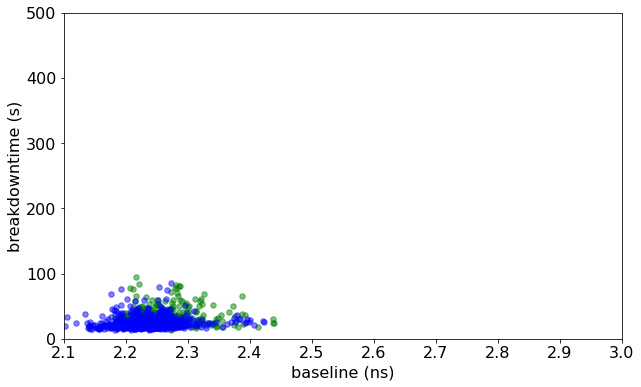

In [14]:
# for control conditions the correlaltion between starting tau and breakdowntime in the above average bright population
bin_above_mean = errorfree_data[(errorfree_data.Mean_init_int256 > np.mean(errorfree_data.Mean_init_int256))]
bin_below_mean = errorfree_data[(errorfree_data.Mean_init_int256 < np.mean(errorfree_data.Mean_init_int256))]
fig = plt.figure()
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
title = 'Start tau vs Breakdowntime in control wells_chem'
untransf_dim = bin_below_mean[bin_below_mean['condition']=='Untransfected_cells']
reagentonly_dim = bin_below_mean[bin_below_mean['condition']=='RNAiMAX_reagent_only']
controls_dim = pd.concat([untransf_dim,reagentonly_dim])
untransf_bright = bin_above_mean[bin_above_mean['condition']=='Untransfected_cells']
reagentonly_bright = bin_above_mean[bin_above_mean['condition']=='RNAiMAX_reagent_only']
controls_bright = pd.concat([untransf_bright,reagentonly_bright])
plt.scatter(controls_bright['start tau(ns)'],controls_bright['breakdown_time(s)'], marker='o', color='green', s=30, alpha=0.5)
plt.scatter(controls_dim['start tau(ns)'],controls_dim['breakdown_time(s)'], marker='o', color='blue', s=30, alpha=0.5)
plt.xlabel('baseline (ns)')
plt.ylabel('breakdowntime (s)')
#plt.legend(["Above average intensity","Below average intensity"], loc='upper right', fontsize=14)
#plt.title(title)
plt.xlim([2.1,3])
plt.ylim([0,500])
fig.set_size_inches([10,6])
fig.savefig(Path(SAVE_FIGURE[1], title +'.svg'),dpi=300)

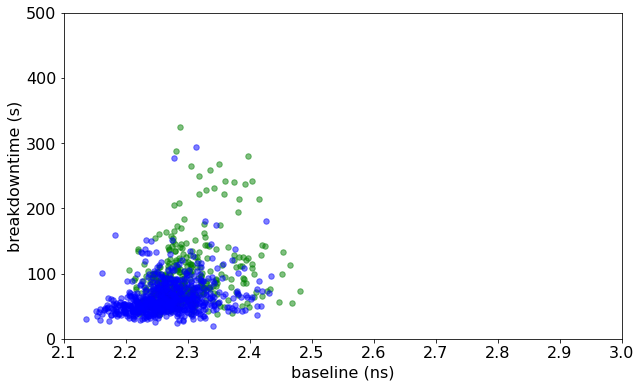

In [15]:
# for PDE3A-KD conditions the correlaltion between starting tau and breakdowntime in the above average bright population
fig = plt.figure()
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
title = 'Start tau vs Breakdowntime in PDE3A wells_chem'
PDE3A_dim = bin_below_mean[bin_below_mean['condition']=='PDE3A']
PDE3A_bright = bin_above_mean[bin_above_mean['condition']=='PDE3A']
plt.scatter(PDE3A_bright['start tau(ns)'],PDE3A_bright['breakdown_time(s)'], marker='o', color='green', s=30, alpha=0.5)
plt.scatter(PDE3A_dim['start tau(ns)'],PDE3A_dim['breakdown_time(s)'], marker='o', color='blue', s=30, alpha=0.5)
plt.xlabel('baseline (ns)')
plt.ylabel('breakdowntime (s)')
#plt.title(title)
plt.xlim([2.1,3])
plt.ylim([0,500])
fig.set_size_inches([10,6])
fig.savefig(Path(SAVE_FIGURE[1], title +'.svg'),dpi=300)

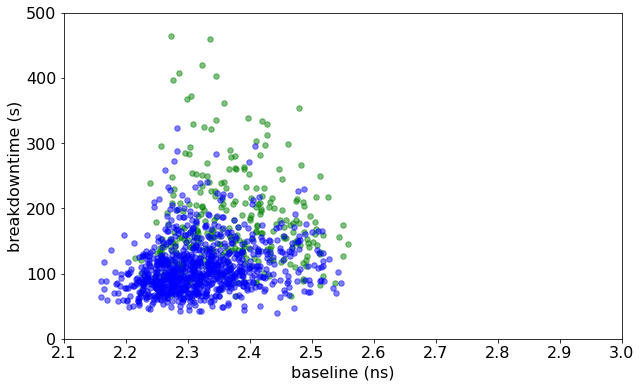

In [17]:
# for Cilostamide conditions the correlaltion between starting tau and breakdowntime in the above average bright population
fig = plt.figure()
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
title = 'Start tau vs Breakdowntime in Cilostamide wells_chem'
Cilo_dim = bin_below_mean[bin_below_mean['condition']=='1uM_Cilostamide']
Cilo_bright = bin_above_mean[bin_above_mean['condition']=='1uM_Cilostamide']
plt.scatter(Cilo_bright['start tau(ns)'],Cilo_bright['breakdown_time(s)'], marker='o', color='green', s=30, alpha=0.5)
plt.scatter(Cilo_dim['start tau(ns)'],Cilo_dim['breakdown_time(s)'], marker='o', color='blue', s=30, alpha=0.5)
plt.xlabel('baseline (ns)')
plt.ylabel('breakdowntime (s)')
#plt.title(title)
plt.xlim([2.1,3])
plt.ylim([0,500])
fig.set_size_inches([10,6])
fig.savefig(Path(SAVE_FIGURE[1], title +'.svg'),dpi=300)